# New York Energy Consumption

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/enerfy.png" width="1000">


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
import plotly.express as px

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/nyc_energy_consumption.csv

--2021-04-13 15:09:25--  https://frenzy86.s3.eu-west-2.amazonaws.com/timeseries/nyc_energy_consumption.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.90
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1867062 (1.8M) [text/csv]
Saving to: ‘nyc_energy_consumption.csv’

nyc_energy_consumpt 100%[===================>]   1.78M  2.65MB/s    in 0.7s    

2021-04-13 15:09:26 (2.65 MB/s) - ‘nyc_energy_consumption.csv’ saved [1867062/1867062]



In [3]:
df = pd.read_csv('nyc_energy_consumption.csv')

In [4]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [6]:
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [14]:
fig = px.line(df, 
              x='timeStamp', 
              y='demand', 
              title='NYC Energy Demand',
              color_discrete_map={'demand':'red'}
              )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [25]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  5

Features : 
 ['timeStamp', 'demand', 'precip', 'temp', 'precio']

Missing values :   timeStamp    False
demand       False
precip       False
temp         False
precio       False
dtype: bool

Unique values :  
 timeStamp    49205
demand       40972
precip        1004
temp          7580
precio        1004
dtype: int64


In [26]:
df.query('demand != demand')

,timeStamp,demand,precip,temp,precio


In [27]:
## Fillna on demand and temp columns
df['demand']=df['demand'].fillna(method='ffill') #Ffill or forward-fill propagates the last observed non-null value forward until another non-null value is encountered.
df['temp']=df['temp'].fillna(method='ffill')
df['precip']=df['precip'].fillna(method='ffill')     #Ffill or forward-fill propagates the last observed non-null value forward until another non-null value is encountered.

In [23]:
print ("\nMissing values :  ", df.isnull().any())


Missing values :   timeStamp    False
demand       False
precip       False
temp         False
precio       False
dtype: bool


In [ ]:
ny_df=df.set_index('timeStamp')

In [ ]:
ny_df

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.500,0.0000,46.13
2012-01-01 01:00:00,4752.100,0.0000,45.89
2012-01-01 02:00:00,4542.600,0.0000,45.04
2012-01-01 03:00:00,4357.700,0.0000,45.03
2012-01-01 04:00:00,4275.500,0.0000,42.61
...,...,...,...
2017-08-12 02:00:00,5534.683,0.0000,70.84
2017-08-12 03:00:00,5534.683,0.0000,70.57
2017-08-12 04:00:00,5534.683,0.0000,69.89


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fe7321c90>,
      dtype=object)

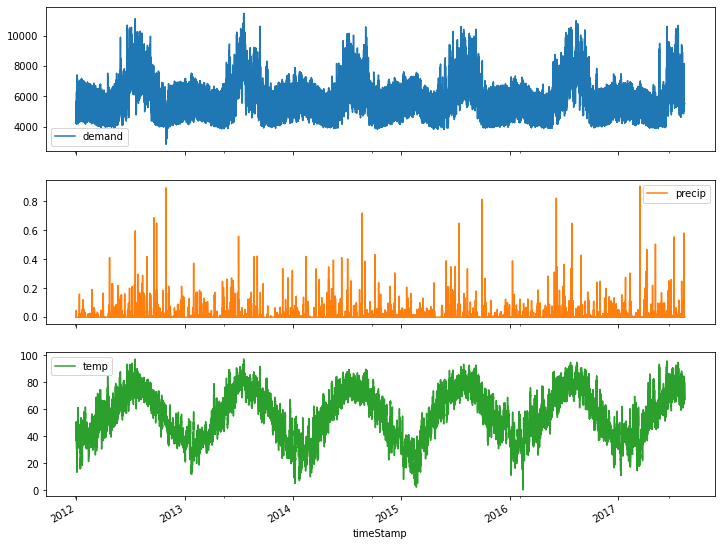

In [ ]:
ny_df.plot(subplots=True,figsize=(12,10))

In [ ]:
ny_df.resample('M').mean() # end month

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fe4d76b50>,
      dtype=object)

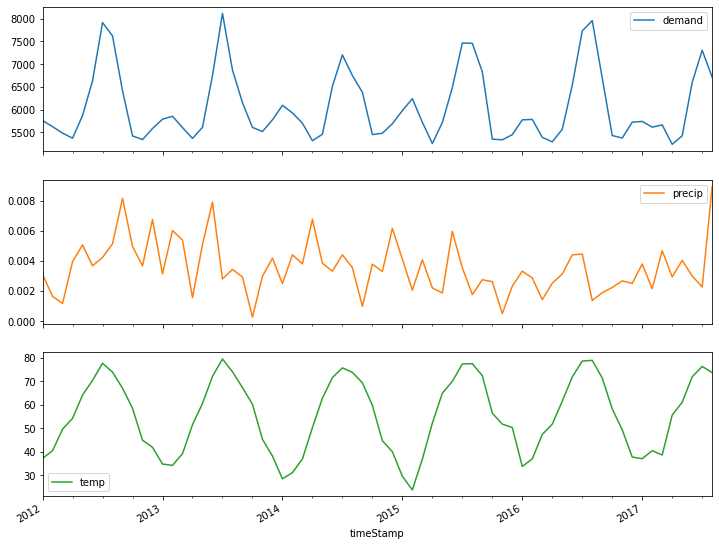

In [ ]:
ny_df.resample('M').mean().plot(subplots=True,
                                figsize=(12,10))

In [ ]:
ny_df_monthly=ny_df.resample('M').mean()
ny_df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.8MB/s 
     |████████████████████████████████| 2.1MB 24.8MB/s 
     |████████████████████████████████| 9.5MB 49.9MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'], 
                      m=12, 
                      seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.983, Time=1.35 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.85 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1014.271, Time=1.58 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.17 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=99

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Tue, 13 Apr 2021   AIC                            993.144
Time:                                         13:44:40   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.257      4.697      0.000    2168.827    5274.418
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ny_df_monthly

,demand,precip,temp
timeStamp,,,
2012-01-31,5757.495833,0.003116,37.174288
2012-02-29,5622.331609,0.001650,40.448046
2012-03-31,5479.919198,0.001179,49.607917
2012-04-30,5368.945833,0.003959,54.255903
2012-05-31,5867.896102,0.005064,64.188078
...,...,...,...
2017-04-30,5233.477382,0.002942,55.621764
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625


In [ ]:
train=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [ ]:
len(test)

4

In [ ]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [ ]:
test.shape

(4, 3)

In [ ]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast=model.predict(n_periods=4, 
                       return_conf_int=True)

In [ ]:
forecast

(array([5320.83276907, 6194.15059815, 7184.10814673, 7297.99963366]),
 array([[4724.37020673, 5917.29533142],
        [5391.43563153, 6996.86556476],
        [6358.61998436, 8009.59630911],
        [6467.74938444, 8128.24988287]]))

In [ ]:
forecast_df = pd.DataFrame(forecast[0],
                           index = test.index,
                           columns=['Prediction'])

In [ ]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5320.832769
2017-06-30,6194.150598
2017-07-31,7184.108147
2017-08-31,7297.999634


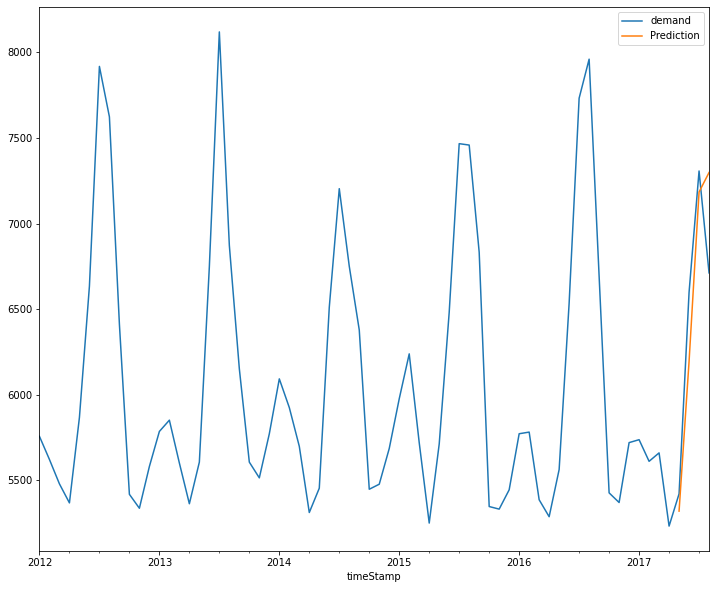

In [ ]:
pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot(figsize=(12,10))

In [ ]:
forecast1=model.predict(n_periods=8, 
                        return_conf_int=True)

In [ ]:
forecast1

(array([5320.83276907, 6194.15059815, 7184.10814673, 7297.99963366,
        6401.92728845, 5789.92421629, 5693.03964569, 5951.57311138]),
 array([[4724.37020673, 5917.29533142],
        [5391.43563153, 6996.86556476],
        [6358.61998436, 8009.59630911],
        [6467.74938444, 8128.24988287],
        [5553.64734295, 7250.20723395],
        [4934.10755219, 6645.74088039],
        [4837.08542511, 6548.99386628],
        [5094.9472566 , 6808.19896616]]))

In [28]:
# create the dataframe index for forecasting
forecast_range=pd.date_range(start='2017-05-31', 
                             periods=8,
                             freq='M')

In [ ]:
forecast1[0] #valore medio del forecasted

array([5320.83276907, 6194.15059815, 7184.10814673, 7297.99963366,
       6401.92728845, 5789.92421629, 5693.03964569, 5951.57311138])

In [ ]:
forecast1_df = pd.DataFrame(forecast1[0],
                            index =forecast_range,
                            columns=['Prediction'])

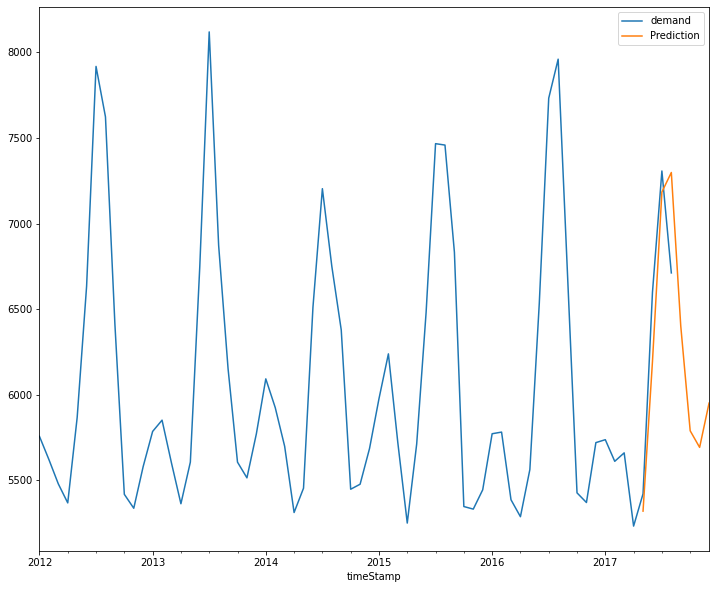

In [ ]:
pd.concat([ny_df_monthly['demand'],forecast1_df],
                        axis=1).plot(figsize=(12,10))

In [ ]:
forecast1[1] # prima colonna min, seconda max

array([[4724.37020673, 5917.29533142],
       [5391.43563153, 6996.86556476],
       [6358.61998436, 8009.59630911],
       [6467.74938444, 8128.24988287],
       [5553.64734295, 7250.20723395],
       [4934.10755219, 6645.74088039],
       [4837.08542511, 6548.99386628],
       [5094.9472566 , 6808.19896616]])

In [ ]:
lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

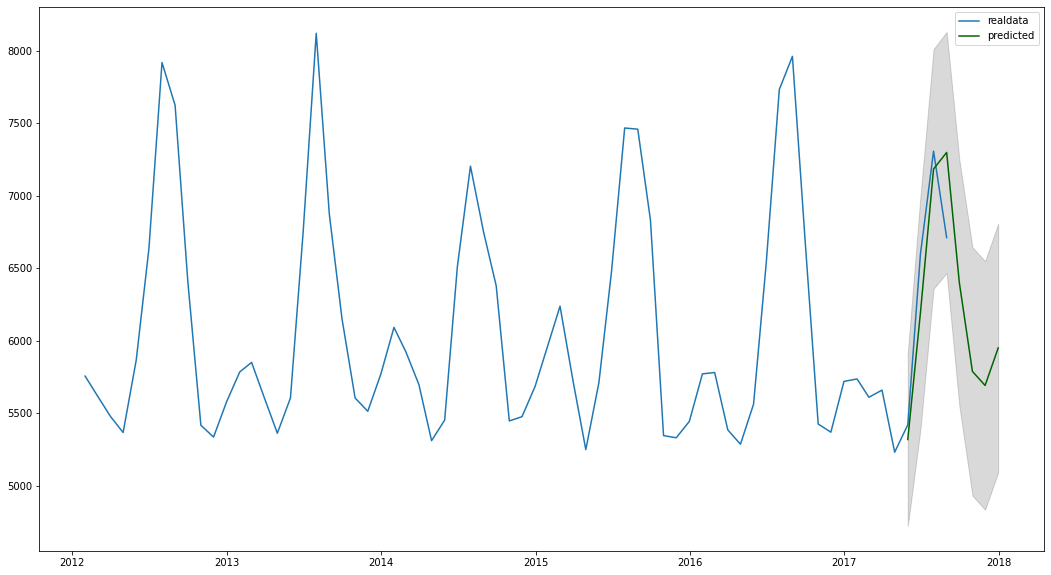

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(ny_df_monthly['demand'],label='realdata')
plt.plot(forecast1_df, color='darkgreen',label='predicted')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)
plt.legend()

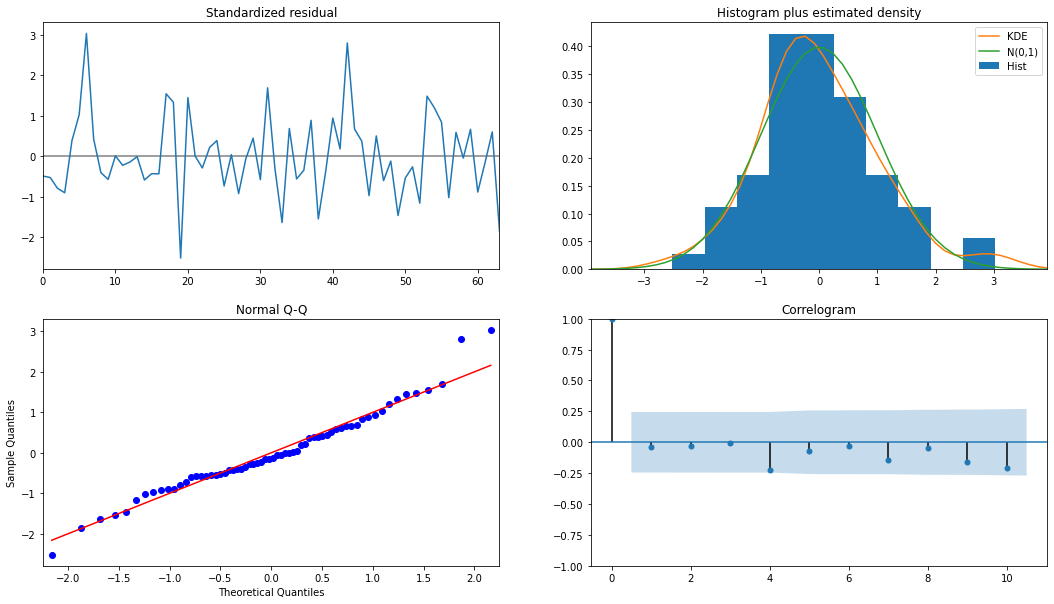

In [ ]:
out=model.plot_diagnostics(figsize=(18,10))